In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Gambar Asli


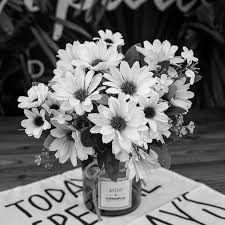

Gambar Low Pass


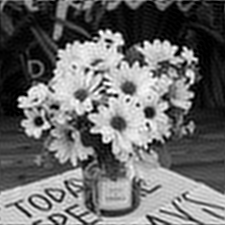

In [ ]:
from scipy import fftpack
import numpy as np
import imageio
from PIL import Image, ImageDraw
import cv2
from google.colab.patches import cv2_imshow

image1 = imageio.imread('/content/drive/MyDrive/bunga_daisy.png',as_gray=True)
print('Gambar Asli')
cv2_imshow(image1)
#convert image to numpy array
image1_np=np.array(image1)

#fft of image
fft1 = fftpack.fftshift(fftpack.fft2(image1_np))

#Create a low pass filter image
x,y = image1_np.shape[0],image1_np.shape[1]
#size of circle
e_x,e_y=100,100
#create a box 
bbox=((x/2)-(e_x/2),(y/2)-(e_y/2),(x/2)+(e_x/2),(y/2)+(e_y/2))

low_pass=Image.new("L",(image1_np.shape[0],image1_np.shape[1]),color=0)

draw1=ImageDraw.Draw(low_pass)
draw1.ellipse(bbox, fill=1)

low_pass_np=np.array(low_pass)

#multiply both the images
filtered=np.multiply(fft1,low_pass_np)

#inverse fft
ifft2 = np.real(fftpack.ifft2(fftpack.ifftshift(filtered)))
ifft2 = np.maximum(0, np.minimum(ifft2, 255))
print('Gambar Low Pass')
cv2_imshow(ifft2)

#save the image
#imageio.imsave('fft-then-ifft.png', ifft2.astype(np .uint8))